 # Supervised Learning: More Regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Please read the sklearn documentation if you need to figure out the inputs and outputs of these functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


 ## PART 1: SIMPLE LINEAR REGRESSION



 We'll analyze the relationship between study hours and exam scores using three different methods.

Dataset:
   Hours_Studied  Exam_Score
0            1.5          45
1            2.0          51
2            2.5          58
3            3.0          62
4            3.5          68
5            4.0          73
6            4.5          78
7            5.0          84
8            5.5          88
9            6.0          93


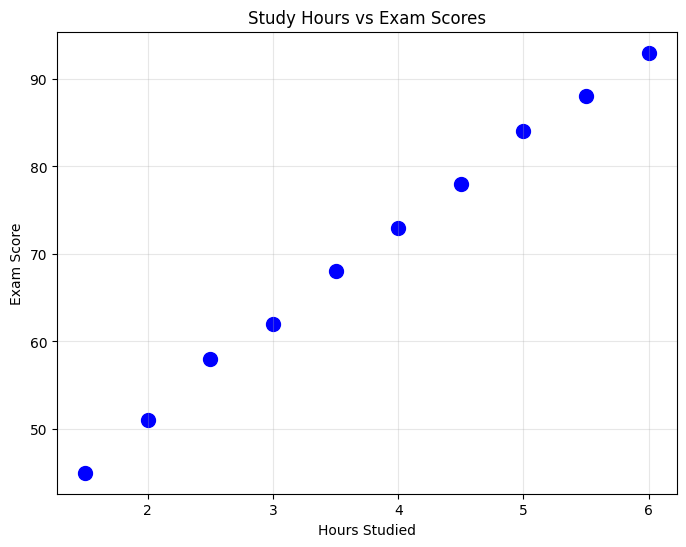

In [11]:
# Dataset: Study Hours vs Exam Scores
data = {
    'Hours_Studied': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    'Exam_Score': [45, 51, 58, 62, 68, 73, 78, 84, 88, 93]
}
df = pd.DataFrame(data)

print("Dataset:")
print(df)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', s=100)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Scores')
plt.grid(True, alpha=0.3)
plt.show()


 ### TASK 1: Manual Least Squares Calculation



 Calculate the slope (m) and intercept (b) for y = mx + b using the **FIRST 5 DATA POINTS ONLY**.



 **Formulas:**

 - Slope: $m = \frac{n\sum xy - \sum x \sum y}{n\sum x^2 - (\sum x)^2}$

 - Intercept: $b = \frac{\sum y - m\sum x}{n}$

In [12]:
# Use first 5 data points
x_manual = df['Hours_Studied'][:5].values
y_manual = df['Exam_Score'][:5].values

n = len(x_manual)

# TODO: Calculate sums needed
sum_x = sum(x_manual)# TODO: Calculate sum of x
sum_y = sum(y_manual)# TODO: Calculate sum of y
sum_xy = sum(x_manual*y_manual)# TODO: Calculate sum of x*y
sum_x_squared = sum(x_manual**2)# TODO: Calculate sum of x²

# TODO: Calculate slope and intercept using formulas above
m_manual = (n* sum_xy - sum_x*sum_y )/ (n* sum_x_squared - (sum_x)**2)# TODO
b_manual = (sum_y - m_manual * sum_x) / n# TODO

print("TASK 1 - Manual Calculation (first 5 points):")
print(f"Slope (m): {m_manual}")
print(f"Intercept (b): {b_manual}")
print(f"Equation: y = {m_manual:.2f}x + {b_manual:.2f}\n")

# TODO: Make predictions and calculate errors
y_pred_manual = m_manual * x_manual + b_manual# TODO: Calculate predictions using y = mx + b
mae_manual = mean_absolute_error(y_manual, y_pred_manual)# TODO: Calculate MAE using mean_absolute_error
mse_manual = mean_squared_error(y_manual, y_pred_manual)# TODO: Calculate MSE using mean_squared_error

print(f"MAE: {mae_manual:.2f}")
print(f"MSE: {mse_manual:.2f}")


TASK 1 - Manual Calculation (first 5 points):
Slope (m): 11.4
Intercept (b): 28.3
Equation: y = 11.40x + 28.30

MAE: 0.48
MSE: 0.38


 ### TASK 2: NumPy lstsq (Full Dataset)



 Use `np.linalg.lstsq` to find the best fit line for all 10 data points.



 #### Why Add a Column of Ones?



 When we use `np.linalg.lstsq`, we're solving the matrix equation: **Xβ = y**



 For a linear regression equation **y = mx + b**, we need to find both:

 - **m** (slope)

 - **b** (intercept)



 The design matrix must be structured so that matrix multiplication gives us: **b·1 + m·x**



 ```

 Design Matrix (X):        Coefficients (β):     Result (y):

 [1  x₁]                   [b]                   [b·1 + m·x₁]

 [1  x₂]           ×       [m]          =        [b·1 + m·x₂]

 [1  x₃]                                         [b·1 + m·x₃]

 ...

 ```



 **Key Points:**

 - The column of ones multiplies with the intercept **b** to add that constant term to each prediction

 - The column of x values multiplies with the slope **m** to add the variable component

 - **Without the ones column:** We'd only fit lines through the origin (b=0): y = mx

 - **With the ones column:** We can fit any line: y = mx + b

In [ ]:
# TODO: Prepare the design matrix
# Hint: Use np.column_stack to combine a column of ones with the Hours_Studied values
X_numpy = np.column_stack(np.ones(10), df['Hours_Studied'].values)# TODO: Create design matrix [ones, x_values]
y_numpy = df['Exam_Score'].values

# TODO: Use np.linalg.lstsq
solution, residuals, rank, s = np.linalg.lstsq(X_numpy, y_numpy)# TODO: Complete this line

# TODO: Extract coefficients
b_numpy = solution[0]# TODO: Extract intercept (first element)
m_numpy = solution[1]# TODO: Extract slope (second element)

print("TASK 2 - NumPy lstsq (all 10 points):")
print(f"Slope (m): {m_numpy}")
print(f"Intercept (b): {b_numpy}")
print(f"Equation: y = {m_numpy:.2f}x + {b_numpy:.2f}\n")

# TODO: Calculate predictions and errors
y_pred_numpy = X_numpy @ solution # TODO: Calculate predictions (matrix multiplication)
mae_numpy = # TODO: Calculate MAE
mse_numpy = # TODO: Calculate MSE

print(f"MAE: {mae_numpy:.2f}")
print(f"MSE: {mse_numpy:.2f}")


SyntaxError: invalid syntax (727809973.py, line 19)

 ### TASK 3: Scikit-learn LinearRegression (Full Dataset)



 Use sklearn's `LinearRegression` class.



 **Note:** sklearn automatically handles the intercept internally (with `fit_intercept=True` by default), so we don't need to add a column of ones!

In [ ]:
# TODO: Reshape X for sklearn (needs 2D array)
X_sklearn = # TODO: Reshape Hours_Studied to (-1, 1)
y_sklearn = df['Exam_Score'].values

# TODO: Create and fit the model
model = # TODO: Create LinearRegression object
# TODO: Fit the model

# TODO: Extract coefficients
m_sklearn = # TODO: Get slope from model.coef_
b_sklearn = # TODO: Get intercept from model.intercept_

print("TASK 3 - Sklearn LinearRegression (all 10 points):")
print(f"Slope (m): {m_sklearn}")
print(f"Intercept (b): {b_sklearn}")
print(f"Equation: y = {m_sklearn:.2f}x + {b_sklearn:.2f}\n")

# TODO: Calculate predictions and errors
y_pred_sklearn = # TODO: Make predictions
mae_sklearn = # TODO: Calculate MAE
mse_sklearn = # TODO: Calculate MSE

print(f"MAE: {mae_sklearn:.2f}")
print(f"MSE: {mse_sklearn:.2f}")


 ### TASK 4: Comparison and Discussion

In [ ]:
print("="*70)
print("COMPARISON OF ALL THREE METHODS:")
print("="*70)
print(f"{'Method':<30} {'Slope':<12} {'Intercept':<12} {'MAE':<10} {'MSE':<10}")
print("-"*70)
# TODO: Fill in the comparison table with your results
print(f"{'Manual (5 points)':<30} {0:<12.4f} {0:<12.4f} {0:<10.2f} {0:<10.2f}")
print(f"{'NumPy (10 points)':<30} {0:<12.4f} {0:<12.4f} {0:<10.2f} {0:<10.2f}")
print(f"{'Sklearn (10 points)':<30} {0:<12.4f} {0:<12.4f} {0:<10.2f} {0:<10.2f}")


In [ ]:
# TODO: Plot all three regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='black', s=100, label='Data', zorder=3)

# TODO: Create x range for plotting
x_range = np.linspace(1, 6, 100)

# TODO: Plot each regression line with different styles
# Hint: Use different linestyles: '--', '-', ':'

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


 ### Discussion Questions



 **1. Why do the manual calculations differ from NumPy and sklearn?**



 *YOUR ANSWER:*



 ---



 **2. Why are NumPy and sklearn results nearly identical?**



 *YOUR ANSWER:*



 ---



 **3. Which method produced the lowest error? Why?**



 *YOUR ANSWER:*



 ---

 ## PART 2: MULTIPLE LINEAR REGRESSION



 Now we'll predict house prices using multiple features.

In [ ]:
# Dataset: House Prices
house_data = {
    'Size_sqft': [1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200, 3500,
                  1300, 1600, 1900, 2100, 2400, 2600, 2900, 3100, 3300, 3600],
    'Bedrooms': [2, 3, 3, 3, 4, 4, 4, 4, 5, 5,
                 2, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'Age_years': [15, 20, 10, 5, 8, 3, 12, 6, 15, 2,
                  18, 12, 8, 10, 5, 7, 4, 9, 11, 1],
    'Price_1000s': [180, 210, 250, 280, 310, 350, 360, 400, 420, 480,
                    190, 230, 270, 300, 340, 370, 390, 430, 450, 510]
}
house_df = pd.DataFrame(house_data)

print("House Price Dataset:")
print(house_df)


 ### TASK 5: Justify Multiple Linear Regression



 Calculate correlations to understand relationships between features and price.

In [ ]:
print("Correlations with Price:")
# TODO: Calculate correlation between each feature and price
for col in ['Size_sqft', 'Bedrooms', 'Age_years']:
    corr = # TODO: Calculate correlation
    print(f"{col}: {corr:.3f}")


 **Why should we use multiple linear regression instead of simple linear regression?**



 *YOUR ANSWER:*



 ---

 ### TASK 6: Implement Multiple Linear Regression

In [ ]:
# TODO: Prepare features and target
X_multi = # TODO: Select feature columns
y_multi = # TODO: Select target column

# TODO: Split into training and testing sets (80-20 split)
# The purpose of splitting the data into a training and testing set is to save some of the data to test the model that we trained.
# The test data set needs to be separate from the training data so we can simulate "new" situations before we put our model out in the real world.
# Hint: There is a very helpful sklearn method you should use for this step
X_train, X_test, y_train, y_test = # TODO

# TODO: Create and train the model
mlr_model = # TODO: Create LinearRegression object
# TODO: Fit the model

# TODO: Make predictions
y_train_pred = # TODO: Predictions on training set
y_test_pred = # TODO: Predictions on test set

# TODO: Extract coefficients
coefficients = # TODO: Get coefficients
intercept = # TODO: Get intercept

print("Model Coefficients:")
print(f"Intercept: {intercept:.2f}")
for i, col in enumerate(X_multi.columns):
    print(f"{col}: ???")  # TODO: Fill in actual coefficient

print("\nModel Equation:")
print("Price = ??? + ???*Size + ???*Bedrooms + ???*Age")  # TODO: Complete


 ### TASK 7: Calculate and Interpret Errors

In [ ]:
# TODO: Calculate training errors (how far were predictions from the real prices)
train_mae = # TODO
train_mse = # TODO
train_rmse = # TODO: np.sqrt(train_mse)

# TODO: Calculate testing errors (how far were predictions from the real prices)
test_mae = # TODO
test_mse = # TODO
test_rmse = # TODO

print("Training Set Performance:")
print(f"MAE: $???k")  # TODO: Fill in
print(f"MSE: $???k²")  # TODO: Fill in
print(f"RMSE: $???k")  # TODO: Fill in

print("\nTest Set Performance:")
print(f"MAE: $???k")  # TODO: Fill in
print(f"MSE: $???k²")  # TODO: Fill in
print(f"RMSE: $???k")  # TODO: Fill in


 ### TASK 8: Visualize Results

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, s=100, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($1000s)')
axes[0].set_ylabel('Predicted Price ($1000s)')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Testing set
# TODO: Complete the test set plot
axes[1].scatter(# TODO
axes[1].plot(# TODO
axes[1].set_xlabel('Actual Price ($1000s)')
axes[1].set_ylabel('Predicted Price ($1000s)')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 ### Final Discussion Questions



 **1. How do the training and test errors compare? What does this tell you? (Recall our discussion on overfitting and underfitting from last week)**



 *YOUR ANSWER:*



 ---



 **2. Which feature has the strongest effect on house price? How can you tell?**



 *YOUR ANSWER:*



 ---



 **3. What is one limitation of this model?**



 *YOUR ANSWER:*



 ---